<a href="https://colab.research.google.com/github/ishita48/Breast-Cancer-Diagnosis-ML-model/blob/main/Breast_Cancer_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

Load DataSet

In [210]:
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Exploratory Data Analysis (EDA)

In [211]:
missing_values = df.isnull().sum()
print('Missing Values:\n', missing_values)

Missing Values:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [212]:
basic_stats = df.describe()
print('Basic Statistics:\n', basic_stats)

Basic Statistics:
        mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.

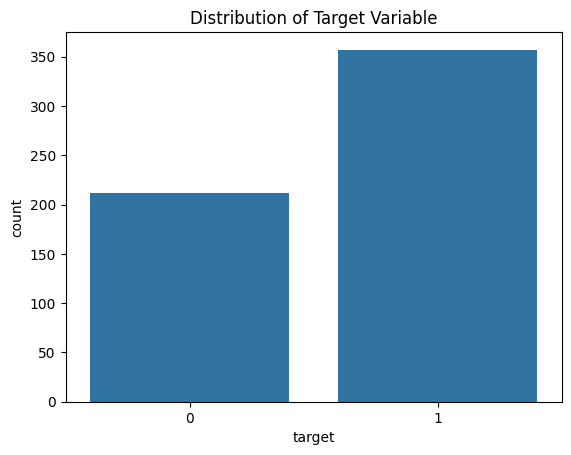

In [213]:
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

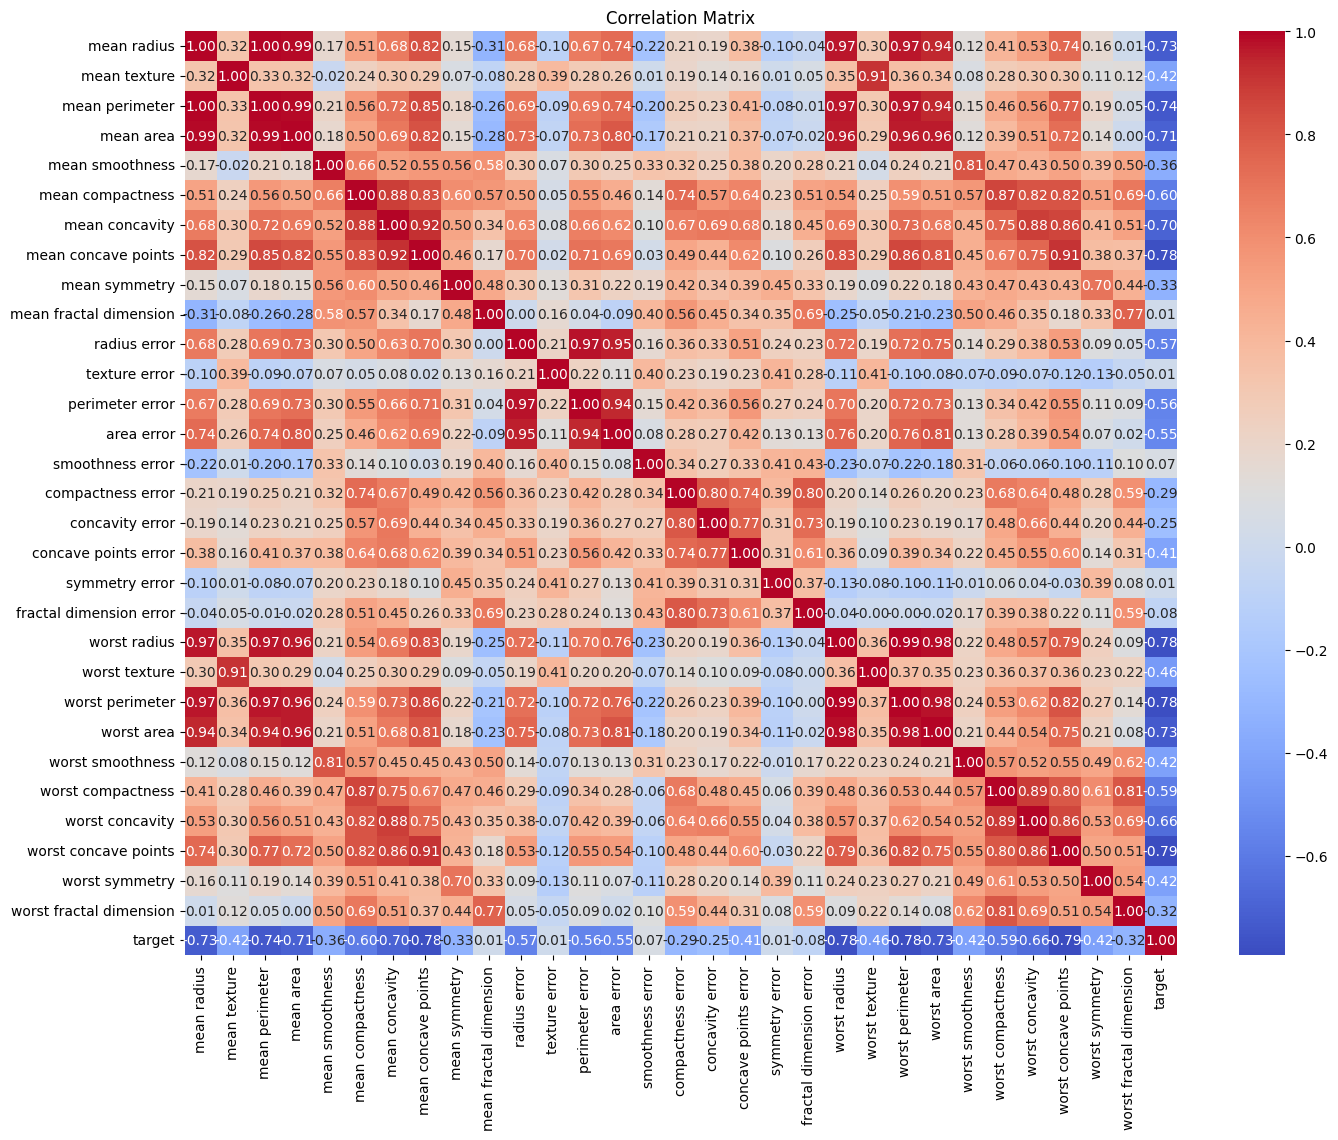

In [214]:
plt.figure(figsize=(16, 12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

<Figure size 1400x1000 with 0 Axes>

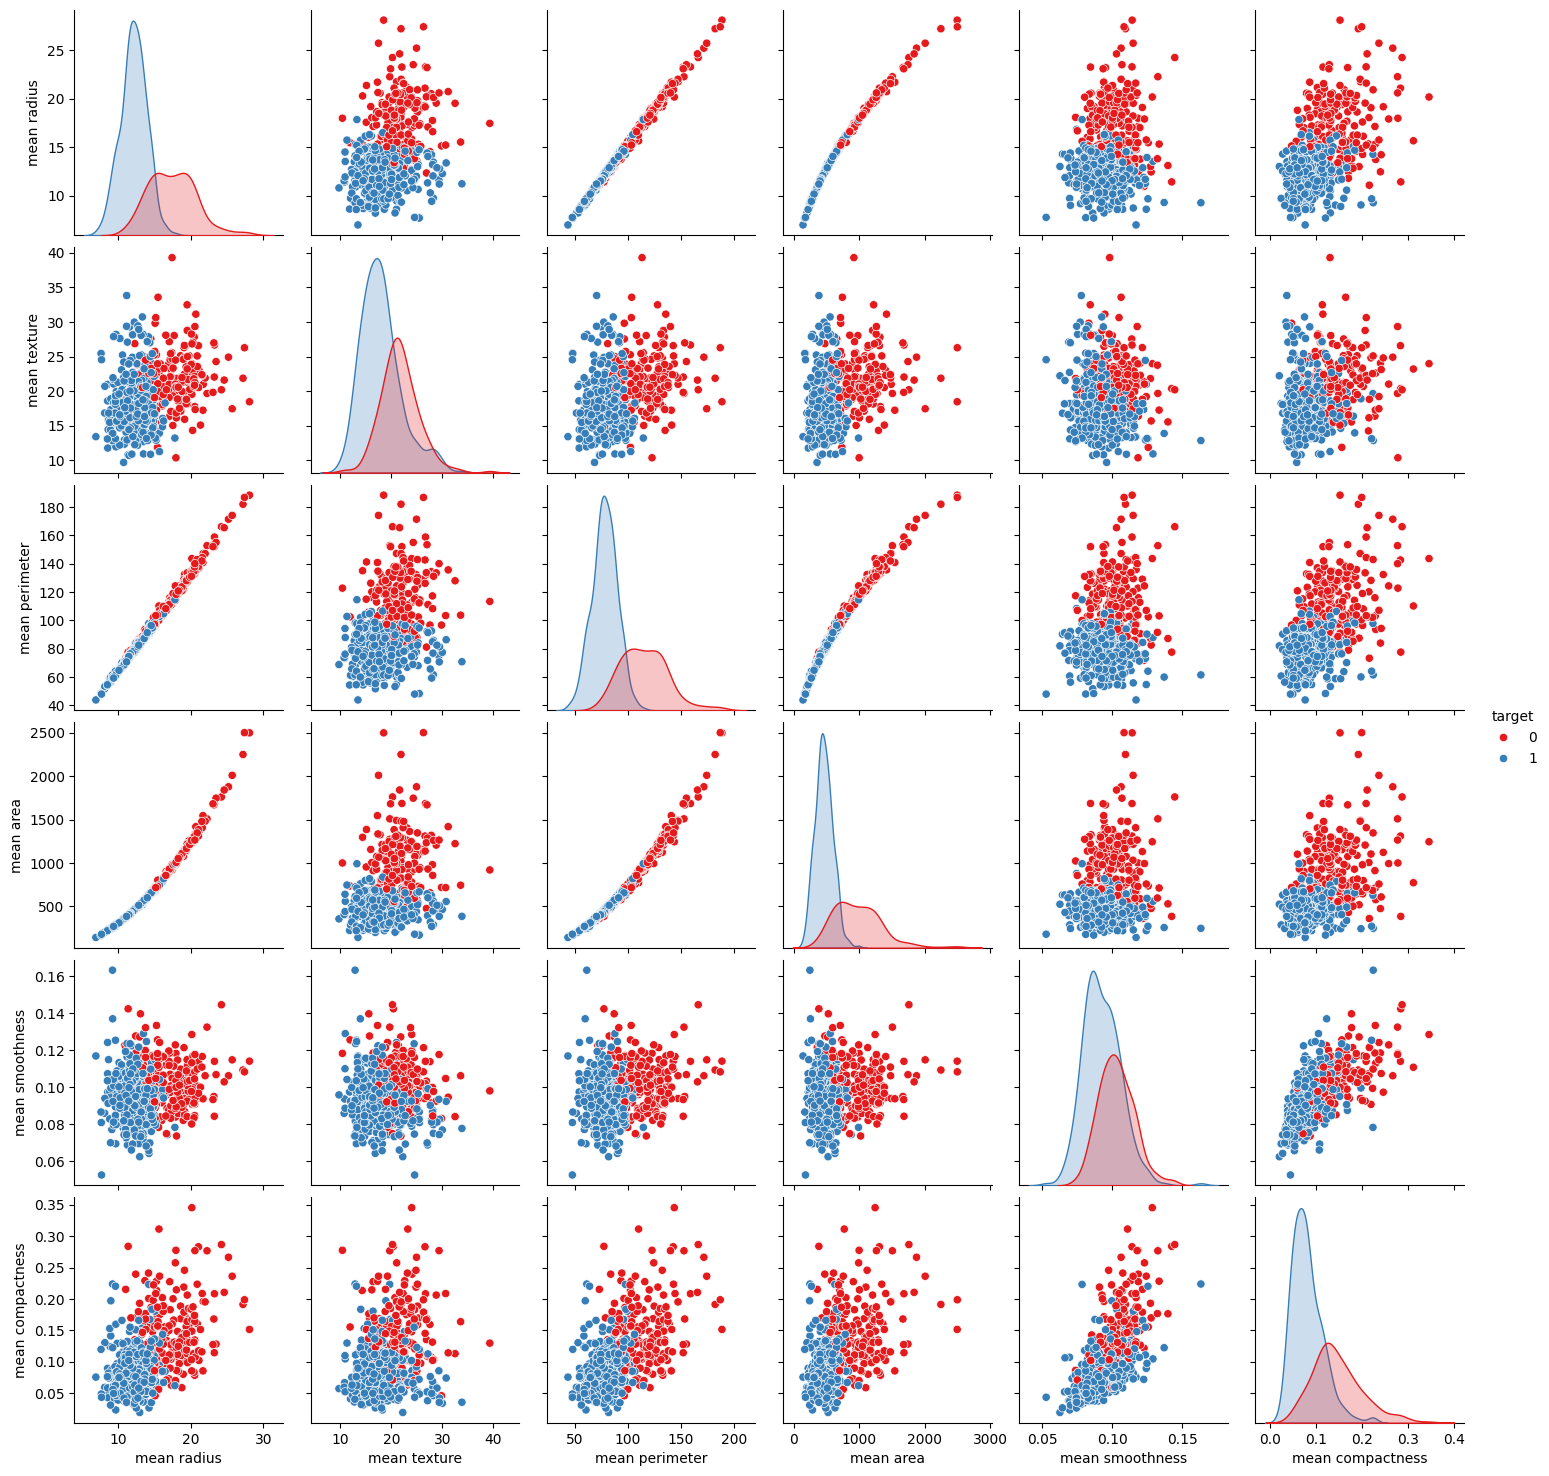

In [215]:
plt.figure(figsize=(14, 10))
sns.pairplot(df, hue='target', vars=df.columns[:6], palette='Set1')
plt.show()

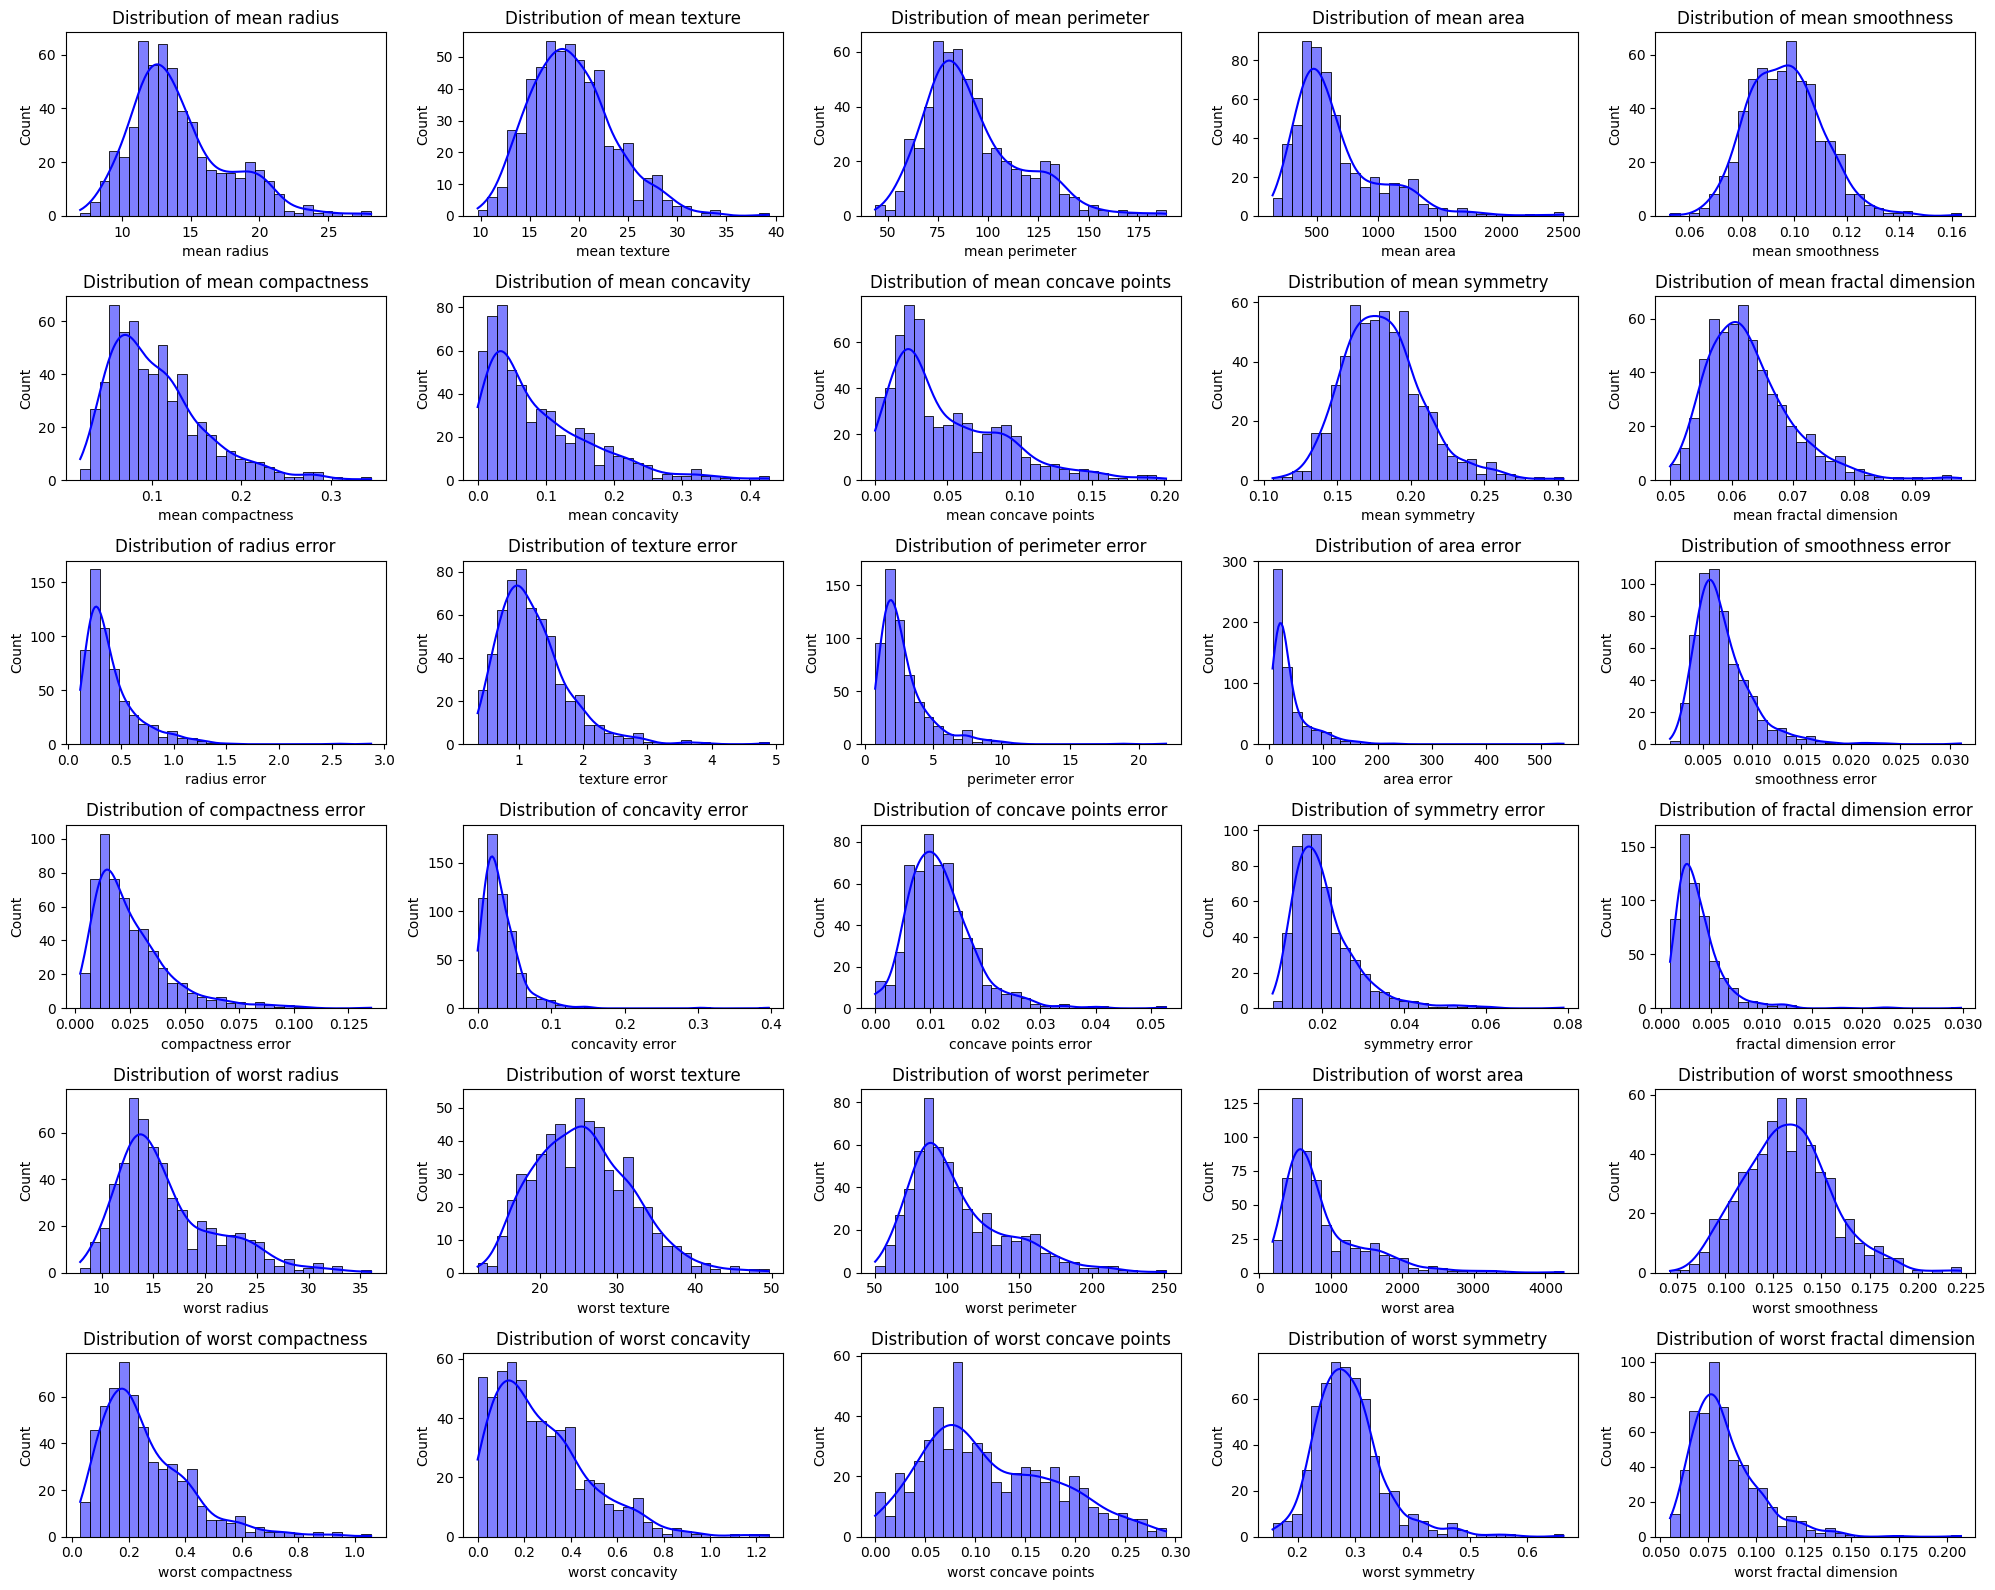

In [216]:
features = df.columns[:-1]  # Exclude target column
plt.figure(figsize=(20, 16))
for i, feature in enumerate(features, 1):
    plt.subplot(6, 5, i)
    sns.histplot(df[feature], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

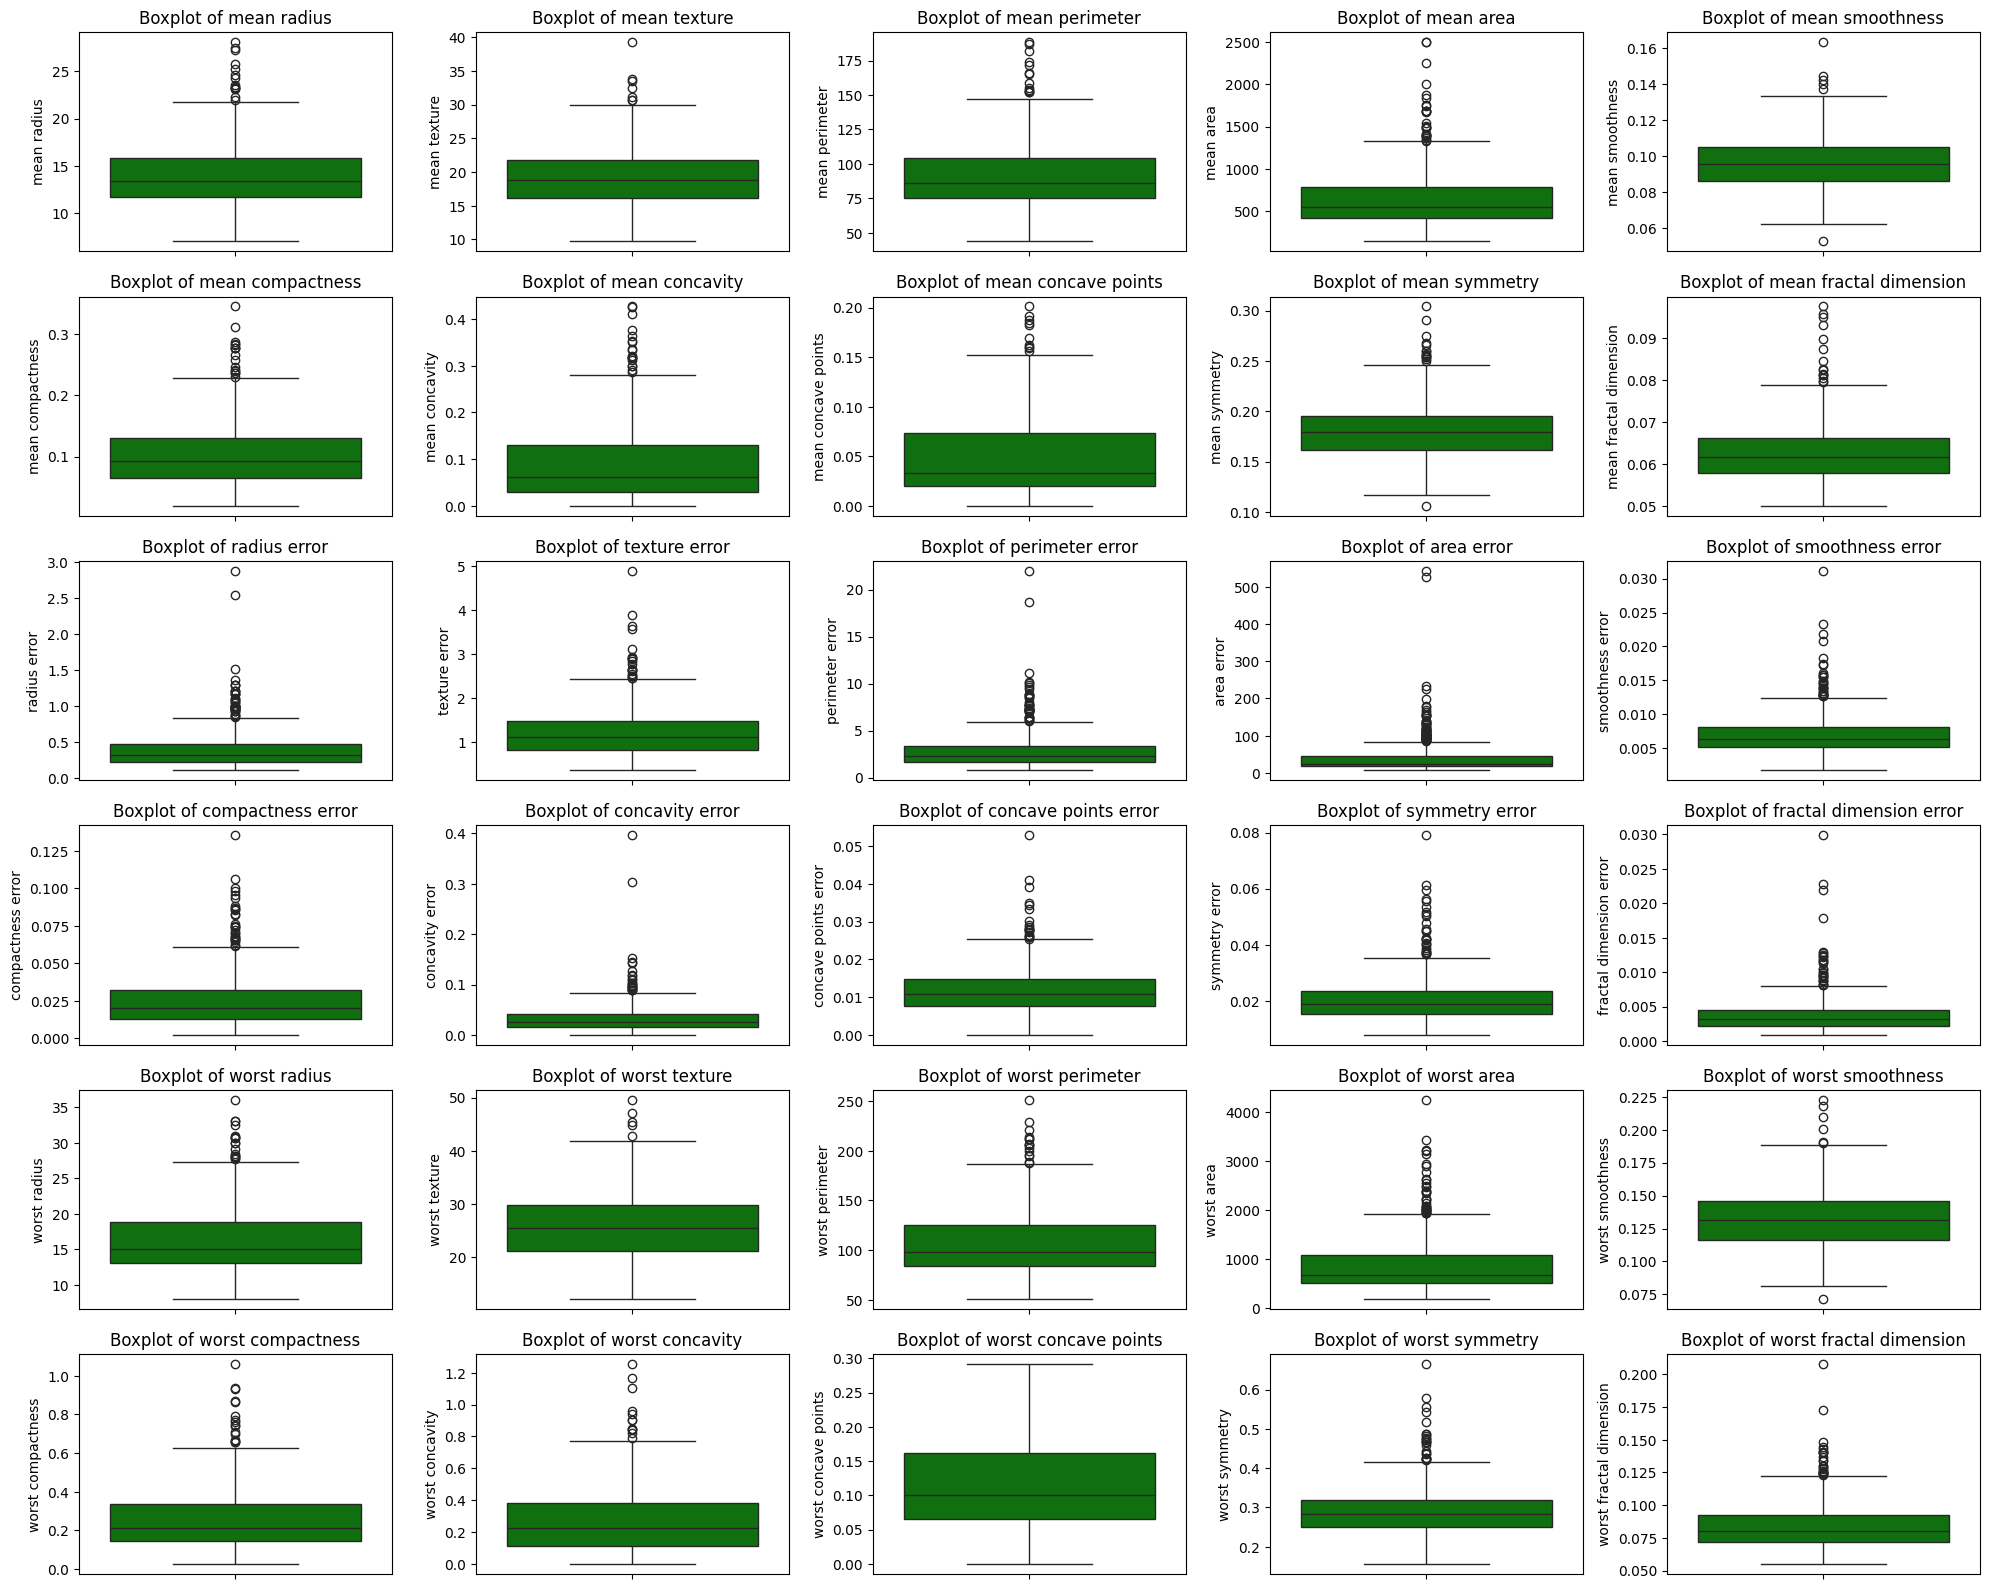

In [217]:
plt.figure(figsize=(20, 16))
for i, feature in enumerate(features, 1):
    plt.subplot(6, 5, i)
    sns.boxplot(y=df[feature], color='green')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

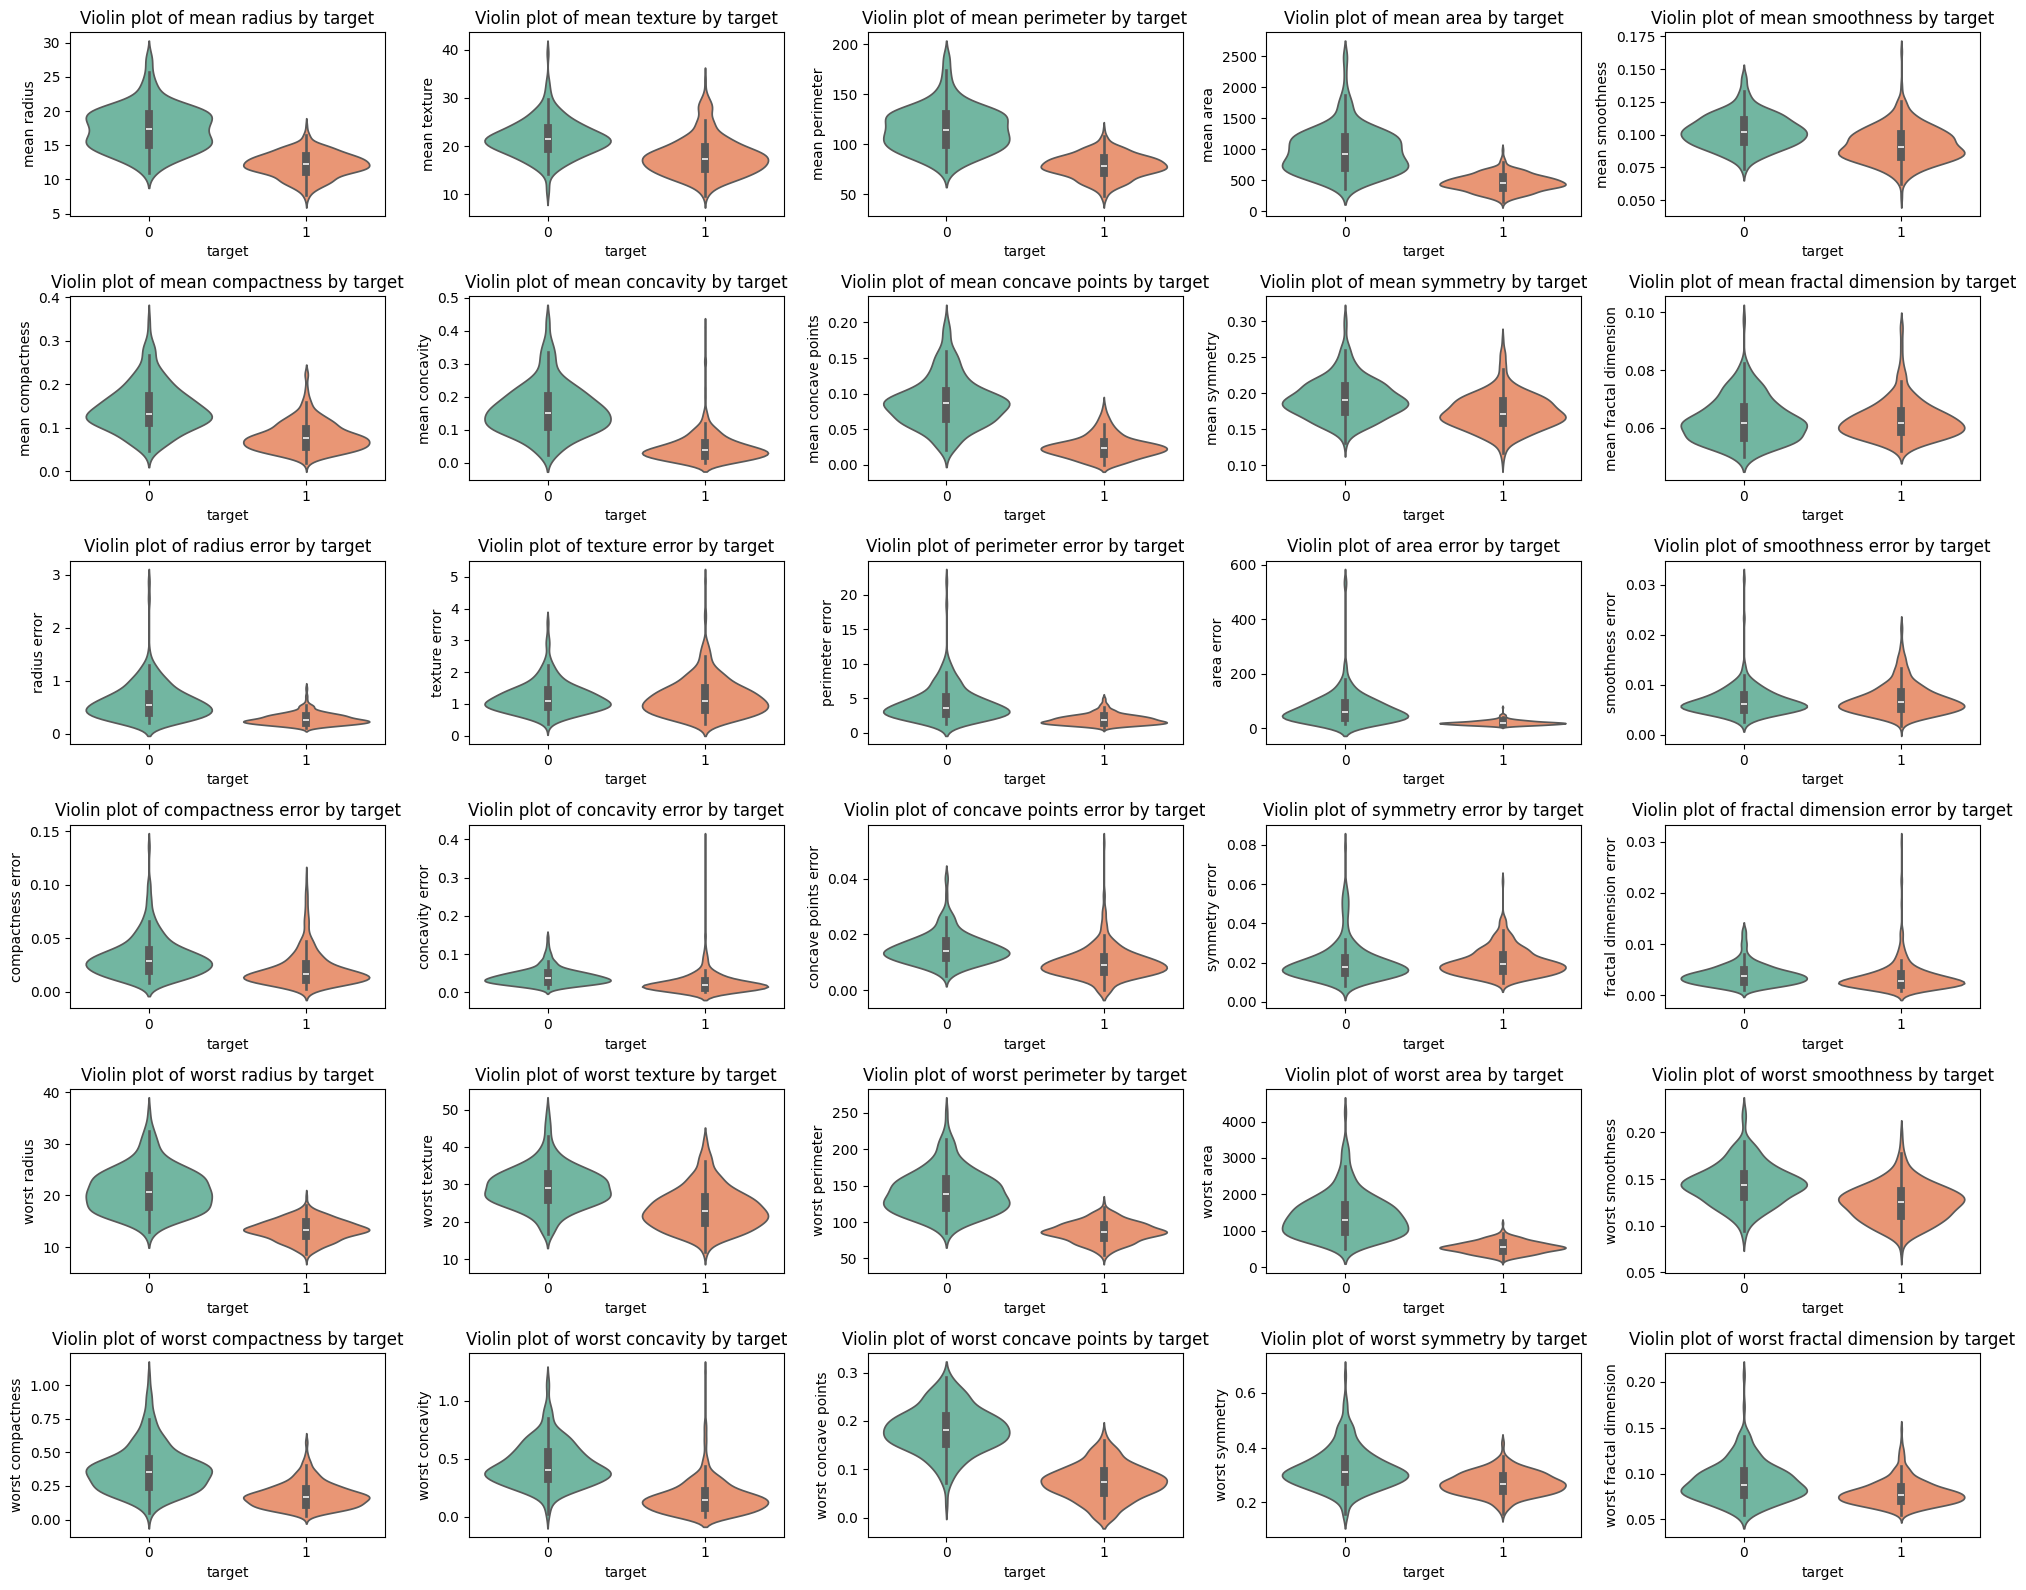

In [218]:
# Violin plots to show distributions by target class
plt.figure(figsize=(20, 16))
for i, feature in enumerate(features, 1):
    plt.subplot(6, 5, i)
    sns.violinplot(x='target', y=df[feature], data=df, hue='target', palette='Set2', dodge=False, legend=False)
    plt.title(f'Violin plot of {feature} by target')
plt.tight_layout()
plt.show()

In [219]:
target_corr = df.corr()['target'].sort_values(ascending=False)
print('Feature Correlations with Target:\n', target_corr)

Feature Correlations with Target:
 target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.

DATA PREPROCESSING

In [220]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [221]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

BUILD AND TRAIN MODEL

In [222]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [223]:
X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_val = np.array(X_val, dtype=np.float32)
y_val = np.array(y_val, dtype=np.float32)

# Print data types to verify
print(X_train.dtype)  # should be float32
print(y_train.dtype)  # should be float32
print(X_val.dtype)    # should be float32
print(y_val.dtype)    # should be float32

float32
float32
float32
float32


ML models that will be used:

In [224]:
sklearn_models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC()
}

evaluate the SKLEARN model

Training Logistic Regression...


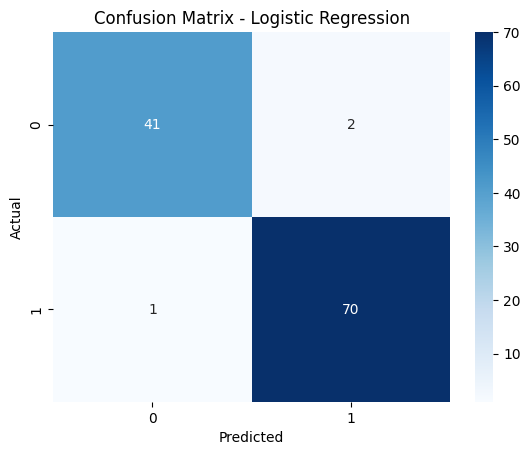

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        43
         1.0       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Training Random Forest...


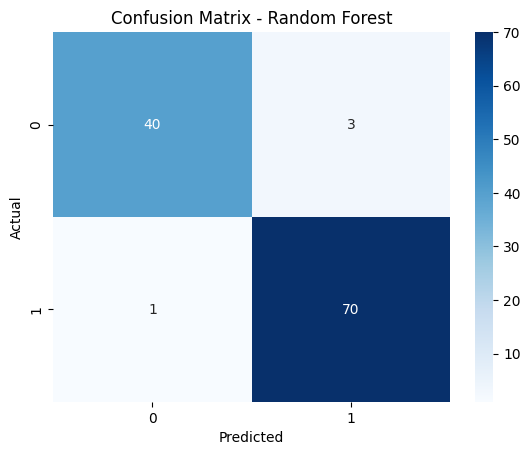

Classification Report for Random Forest:
               precision    recall  f1-score   support

         0.0       0.98      0.93      0.95        43
         1.0       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Training K-Nearest Neighbors...


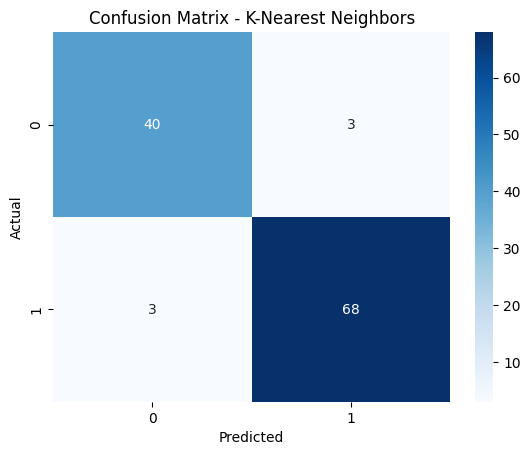

Classification Report for K-Nearest Neighbors:
               precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        43
         1.0       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Training Gradient Boosting...


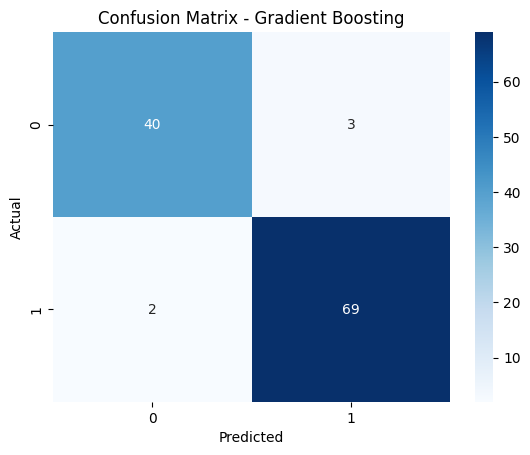

Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

         0.0       0.95      0.93      0.94        43
         1.0       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Training Support Vector Machine...


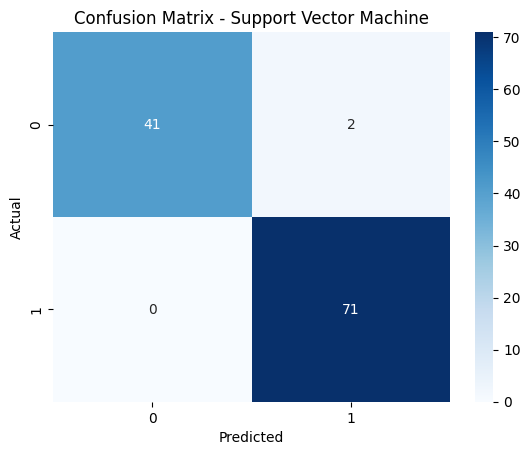

Classification Report for Support Vector Machine:
               precision    recall  f1-score   support

         0.0       1.00      0.95      0.98        43
         1.0       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [225]:
sklearn_results = {}
for name, model in sklearn_models.items():
    print(f'Training {name}...')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    sklearn_results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

    # Confusion matrix
    conf_matrix = confusion_matrix(y_val, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification report
    class_report = classification_report(y_val, y_pred)
    print(f'Classification Report for {name}:\n', class_report)


Accuracy

In [226]:
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for {name}: {accuracy:.2f}')

Accuracy for Support Vector Machine: 0.98


BUILDING NEURAL NETWORK AND TRAINING THE MODELS

In [227]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError

In [228]:
X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_val = np.array(X_val, dtype=np.float32)
y_val = np.array(y_val, dtype=np.float32)

print(X_train.dtype)  # should be float32
print(y_train.dtype)  # should be float32
print(X_val.dtype)    # should be float32
print(y_val.dtype)    # should be float32

float32
float32
float32
float32


-> constructing simple neural network

In [229]:
def build_simple_nn(input_shape):
    model = Sequential()
    model.add(Dense(32, input_dim=input_shape, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='mse', metrics=[RootMeanSquaredError()])
    return model

-> constructing Medium neural network

In [230]:
def build_medium_nn(input_shape):
    model = Sequential()
    model.add(Dense(64, input_dim=input_shape, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='mse', metrics=[RootMeanSquaredError()])
    return model

->constructing large neural network

In [231]:
def build_large_nn(input_shape):
    model = Sequential()
    model.add(Dense(128, input_dim=input_shape, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='mse', metrics=[RootMeanSquaredError()])
    return model

In [232]:
input_shape = X_train.shape[1]

Build Models

In [233]:
simple_nn = build_simple_nn(input_shape)
medium_nn = build_medium_nn(input_shape)
large_nn = build_large_nn(input_shape)

ModelCheckpoints

In [234]:
cp_simple = ModelCheckpoint('models/simple_nn', save_best_only=True)
cp_medium = ModelCheckpoint('models/medium_nn', save_best_only=True)
cp_large = ModelCheckpoint('models/large_nn', save_best_only=True)

Training the models

In [235]:
simple_nn.fit(X_train, y_train, validation_data=(X_val, y_val), callbacks=[cp_simple], epochs=100)

Epoch 1/100
15/15 [==============================] - 1s 55ms/step - loss: 0.1933 - root_mean_squared_error: 0.4396 - val_loss: 0.1397 - val_root_mean_squared_error: 0.3738
Epoch 2/100
15/15 [==============================] - 1s 41ms/step - loss: 0.1116 - root_mean_squared_error: 0.3341 - val_loss: 0.0868 - val_root_mean_squared_error: 0.2946
Epoch 3/100
15/15 [==============================] - 1s 38ms/step - loss: 0.0800 - root_mean_squared_error: 0.2829 - val_loss: 0.0642 - val_root_mean_squared_error: 0.2534
Epoch 4/100
15/15 [==============================] - 1s 39ms/step - loss: 0.0648 - root_mean_squared_error: 0.2546 - val_loss: 0.0519 - val_root_mean_squared_error: 0.2278
Epoch 5/100
15/15 [==============================] - 1s 40ms/step - loss: 0.0556 - root_mean_squared_error: 0.2357 - val_loss: 0.0443 - val_root_mean_squared_error: 0.2104
Epoch 6/100
15/15 [==============================] - 1s 58ms/step - loss: 0.0488 - root_mean_squared_error: 0.2208 - val_loss: 0.0388 - val_

In [236]:
medium_nn.fit(X_train, y_train, validation_data=(X_val, y_val), callbacks=[cp_medium], epochs=100)

Epoch 1/100
15/15 [==============================] - 2s 61ms/step - loss: 0.2222 - root_mean_squared_error: 0.4714 - val_loss: 0.1140 - val_root_mean_squared_error: 0.3376
Epoch 2/100
15/15 [==============================] - 1s 72ms/step - loss: 0.0935 - root_mean_squared_error: 0.3058 - val_loss: 0.0598 - val_root_mean_squared_error: 0.2446
Epoch 3/100
15/15 [==============================] - 1s 83ms/step - loss: 0.0586 - root_mean_squared_error: 0.2421 - val_loss: 0.0423 - val_root_mean_squared_error: 0.2056
Epoch 4/100
15/15 [==============================] - 3s 210ms/step - loss: 0.0432 - root_mean_squared_error: 0.2078 - val_loss: 0.0341 - val_root_mean_squared_error: 0.1847
Epoch 5/100
15/15 [==============================] - 1s 83ms/step - loss: 0.0341 - root_mean_squared_error: 0.1846 - val_loss: 0.0299 - val_root_mean_squared_error: 0.1728
Epoch 6/100
15/15 [==============================] - 2s 174ms/step - loss: 0.0280 - root_mean_squared_error: 0.1673 - val_loss: 0.0272 - va

In [237]:
large_nn.fit(X_train, y_train, validation_data=(X_val, y_val), callbacks=[cp_large], epochs=100)

Epoch 1/100
15/15 [==============================] - 2s 90ms/step - loss: 0.1677 - root_mean_squared_error: 0.4095 - val_loss: 0.0791 - val_root_mean_squared_error: 0.2813
Epoch 2/100
15/15 [==============================] - 1s 94ms/step - loss: 0.0719 - root_mean_squared_error: 0.2681 - val_loss: 0.0359 - val_root_mean_squared_error: 0.1895
Epoch 3/100
15/15 [==============================] - 1s 104ms/step - loss: 0.0411 - root_mean_squared_error: 0.2026 - val_loss: 0.0231 - val_root_mean_squared_error: 0.1520
Epoch 4/100
15/15 [==============================] - 1s 72ms/step - loss: 0.0339 - root_mean_squared_error: 0.1841 - val_loss: 0.0190 - val_root_mean_squared_error: 0.1377
Epoch 5/100
15/15 [==============================] - 1s 64ms/step - loss: 0.0225 - root_mean_squared_error: 0.1500 - val_loss: 0.0170 - val_root_mean_squared_error: 0.1305
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0200 - root_mean_squared_error: 0.1414 - val_loss: 0.0178 - val_

EVALUATE NEURAL MODELS

In [238]:
def evaluate_nn_model(model, name, X_val, y_val):
    print(f"Evaluating {name}...")
    loss, rmse = model.evaluate(X_val, y_val)
    print(f'Root Mean Squared Error for {name}: {rmse:.2f}')

    # Make predictions
    y_pred = (model.predict(X_val) > 0.5).astype("int32")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_val, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification report
    class_report = classification_report(y_val, y_pred)
    print(f'Classification Report for {name}:\n', class_report)

    return {'Accuracy': accuracy_score(y_val, y_pred),
            'Precision': precision_score(y_val, y_pred),
            'Recall': recall_score(y_val, y_pred),
            'F1-score': f1_score(y_val, y_pred)}

Evaluating Simple Neural Network...
4/4 [==============================] - 0s 4ms/step - loss: 0.0210 - root_mean_squared_error: 0.1449
Root Mean Squared Error for Simple Neural Network: 0.14
4/4 [==============================] - 0s 3ms/step


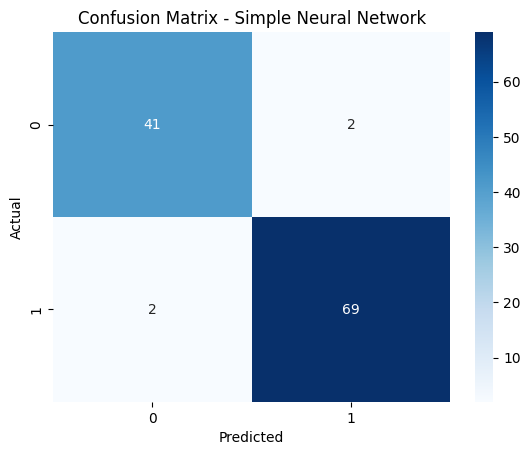

Classification Report for Simple Neural Network:
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        43
         1.0       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Evaluating Medium Neural Network...
4/4 [==============================] - 0s 6ms/step - loss: 0.0290 - root_mean_squared_error: 0.1702
Root Mean Squared Error for Medium Neural Network: 0.17
4/4 [==============================] - 0s 6ms/step


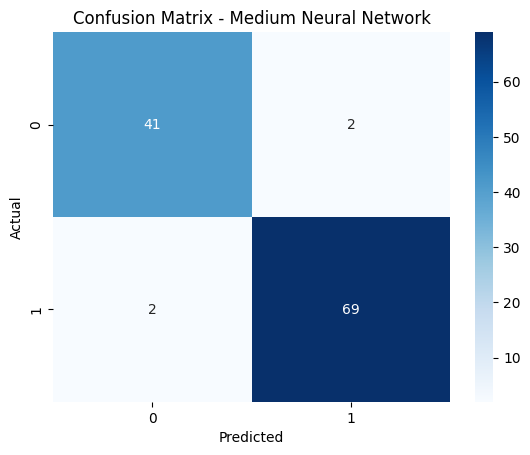

Classification Report for Medium Neural Network:
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        43
         1.0       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Evaluating Large Neural Network...
4/4 [==============================] - 0s 6ms/step - loss: 0.0303 - root_mean_squared_error: 0.1742
Root Mean Squared Error for Large Neural Network: 0.17
4/4 [==============================] - 0s 5ms/step


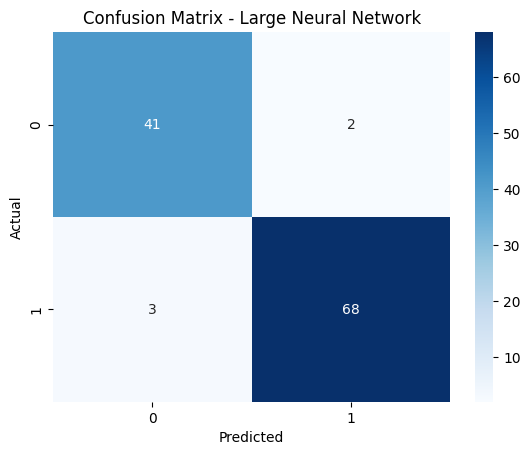

Classification Report for Large Neural Network:
               precision    recall  f1-score   support

         0.0       0.93      0.95      0.94        43
         1.0       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [239]:
nn_results = {}
nn_results['Simple Neural Network'] = evaluate_nn_model(simple_nn, 'Simple Neural Network', X_val, y_val)
nn_results['Medium Neural Network'] = evaluate_nn_model(medium_nn, 'Medium Neural Network', X_val, y_val)
nn_results['Large Neural Network'] = evaluate_nn_model(large_nn, 'Large Neural Network', X_val, y_val)

COMBINE SKLEARN MODELS AND NN MODELS

In [249]:
results = {**sklearn_results, **nn_results}

In [251]:
results_df = pd.DataFrame(results).transpose()
results_df.columns = ['Accuracy', 'Precision', 'Recall', 'F1-score']
results_df

,Accuracy,Precision,Recall,F1-score
Logistic Regression,0.973684,0.972222,0.985915,0.979021
Random Forest,0.964912,0.958904,0.985915,0.972222
K-Nearest Neighbors,0.947368,0.957746,0.957746,0.957746
Gradient Boosting,0.956140,0.958333,0.971831,0.965035
Support Vector Machine,0.982456,0.972603,1.000000,0.986111
Simple Neural Network,0.964912,0.971831,0.971831,0.971831
Medium Neural Network,0.964912,0.971831,0.971831,0.971831
Large Neural Network,0.956140,0.971429,0.957746,0.964539


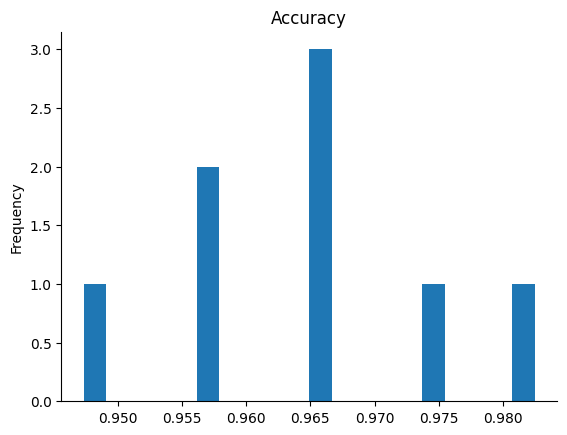

In [253]:
from matplotlib import pyplot as plt
results_df['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Conclusion from Model Performance on Breast Cancer Diagnosis Dataset

After evaluating multiple machine learning models on the breast cancer diagnosis dataset, the following conclusions can be drawn based on their performance metrics:

### Model Comparison

- **Accuracy**: The Support Vector Machine (SVM) achieved the highest accuracy of 98.2%, closely followed by Logistic Regression at 97.4%. Other models such as Random Forest and the neural networks (Simple, Medium, Large) also performed well with accuracies ranging from 95.6% to 97.3%.

- **Precision**: SVM and Logistic Regression demonstrated strong precision, around 97.2% to 97.3%. Random Forest and the neural networks also showed good precision ranging from 95.8% to 97.2%.

- **Recall**: SVM achieved a perfect recall of 100%, indicating it correctly identified all positive cases. Logistic Regression, Random Forest, and Gradient Boosting showed high recall values ranging from 97.1% to 98.6%. The neural networks and K-Nearest Neighbors (KNN) also performed well but slightly lower, around 95.8% to 97.2%.

- **F1-score**: SVM had the highest F1-score of 98.6%, reflecting its balance between precision and recall. Logistic Regression followed closely with an F1-score of 97.9%. Other models like Random Forest, Gradient Boosting, and the neural networks achieved F1-scores between 96.4% to 97.2%.

### Model Selection Recommendations

- **SVM**: This model stands out for its excellent overall performance, particularly in recall and accuracy. It is recommended if the priority is to correctly identify all positive cases with high confidence.

- **Logistic Regression**: Provides a simpler and interpretable model with consistently strong performance across all metrics. It could be preferred in scenarios where interpretability and ease of implementation are crucial.

- **Neural Networks**: The Simple, Medium, and Large neural networks offer competitive performance similar to ensemble methods like Random Forest and Gradient Boosting. Consider these models for their ability to capture complex relationships in the data, although they may require more computational resources.

### Further Considerations

- **Contextual Application**: The choice of model should align with specific application requirements. For instance, if minimizing false positives (high precision) is critical, focus on models with strong precision metrics.

- **Computational Resources**: Evaluate the computational costs associated with training and inference, especially for neural networks, which can be more resource-intensive compared to traditional models like SVM or Logistic Regression.

- **Future Directions**: Consider conducting additional experiments such as hyperparameter tuning or feature selection to potentially enhance the performance of selected models further.

In conclusion, SVM and Logistic Regression demonstrate robust performance across multiple metrics on the breast cancer dataset. Neural networks also show promise and can be explored further depending on the project's specific needs and constraints. These insights provide a solid foundation for making informed decisions in developing a breast cancer diagnostic tool based on machine learning.
